Load Required Libraries

In [ ]:
import numpy as np # mathematical calculation
import pandas as pd  # data preprocessing 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # data visualization

Load Dataset

In [ ]:
df = pd.read_csv("income_evaluation.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Data Exploration and EDA

In [ ]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
len(df.columns)

15

In [ ]:
df[' workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Distribution Among Income Group

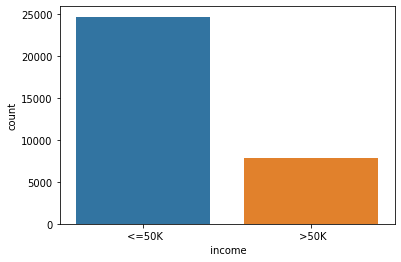

In [ ]:
sns.countplot(x=' income',data=df )

In [ ]:
income = df[' income'].value_counts()
print("Income of Citizens in USA in Price Bracket is given below : \n ",income)

Income of Citizens in USA in Price Bracket is given below : 
   <=50K    24720
 >50K      7841
Name:  income, dtype: int64


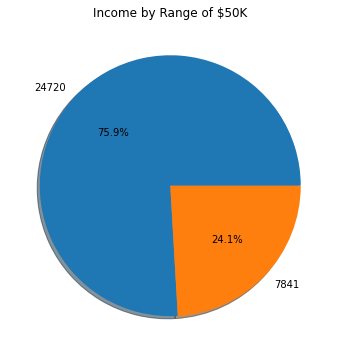

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Income by Range of $50K')
plt.pie(df[' income'].value_counts(), labels=income.values ,  shadow = True, autopct= '%1.1f%%')
plt.show()

In [ ]:
print(f"<= 50k : {round(24720 /32561 * 100 , 2)}")
print(f"> 50k : {round(7841 /32561 * 100 , 2)}")

<= 50k : 75.92
> 50k : 24.08


By All this Analysis we get to know that this is an unbalanced Dataset so we need to Balance it using Undersampling and Oversampling

Feature Engineering

Check Null Values

In [ ]:
## Here we will check the missing values in our dataset
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

Check and Drop/Remove Duplicates

In [ ]:
df.duplicated().sum()

24

In [ ]:
df.drop_duplicates(inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Handling Numerical features

In [ ]:
numerical_features = [i for i in df.columns if df[i].dtypes != "O"]

In [ ]:
numerical_features 

['age',
 ' fnlwgt',
 ' education-num',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week']

In [ ]:
for i in numerical_features:
    print(f" {i}  :  {len(df[i].unique())}")

 age  :  73
  fnlwgt  :  21648
  education-num  :  16
  capital-gain  :  119
  capital-loss  :  92
  hours-per-week  :  94


#### As we can see that education-num has less no of values so this is not Continuous

In [ ]:
df[" education-num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

Handling categorical data 

In [ ]:
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [ ]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

  workclass  :  9
  education  :  16
  marital-status  :  7
  occupation  :  15
  relationship  :  6
  race  :  5
  sex  :  2
  native-country  :  42
  income  :  2


In [ ]:
for feature in  categorical:
    print(df[feature].value_counts()) 
    print("\n \n ")

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

 
 
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name:  education, dtype: int64

 
 
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

 
 
 Prof-specialty       4136
 Craft-repair         409

Handling missing values in categorical features

In [ ]:
print(f"workclass : {round(2093 / 32561 , 4) *100}%")
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native-country : {round(583 / 32561 , 4) *100}%")

workclass : 6.43%
occupation : 5.66%
native-country : 1.79%


In [ ]:
df[" occupation"].mode()[0]

' Prof-specialty'

In [ ]:
df[' native-country'].mode()[0]

' United-States'

In [ ]:
df[' workclass'].mode()[0]

' Private'

**here we have less than 6 percent missing values so we can fill it with mode value**

In [ ]:
df[" workclass"] = df[' workclass'].str.replace('?', 'Private' )
df[' occupation'] = df[' occupation'].str.replace('?', 'Prof-specialty' )
df[' native-country'] = df[' native-country'].str.replace('?', 'United-States' )

#### Club educational categories

In [ ]:
# education Category
df[" education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,inplace = True , regex = True)
df[" education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

#### Club Maritial Status

In [ ]:
#martial status
df[' marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df[' marital-status'].replace(['Divorced', 'Separated','Widowed','Married-spouse-absent'], 'other' , inplace = True , regex = True)

#### For Binary classification keep output as 0 and 1 for more than and less than  
#### $50K income

In [ ]:
# income
df[' income'] = df[' income'].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,3.663562,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,3.912023,Self-emp-not-inc,11.330336,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,3.637586,Private,12.281393,HS-grad,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3.970292,Private,12.366153,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,3.332205,Private,12.732011,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.295837,Private,12.458006,higher,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,3.688879,Private,11.947134,HS-grad,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,4.060443,Private,11.931044,HS-grad,9,other,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,3.091042,Private,12.213495,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

  workclass  :  8
  education  :  6
  marital-status  :  3
  occupation  :  14
  relationship  :  6
  race  :  5
  sex  :  2
  native-country  :  41
  income  :  2


In [ ]:
Education = df[' education'].value_counts()
print("No of Education Level in USA is given below : \n ",Education)

No of Education Level in USA is given below : 
   HS-grad      10494
 higher       10307
 Bachelors     5353
 school        4248
 Masters       1722
 Doctorate      413
Name:  education, dtype: int64


In [ ]:
print(f"HS-grad : {round(10501 /32561 * 100 , 6)}")
print(f"higher : {round(10316 /32561 * 100 , 6)}")
print(f"Bachelors : {round(5355 /32561 * 100 , 6)}")
print(f"school : {round(4253 /32561 * 100 , 6)}")
print(f"Masters : {round(1723 /32561 * 100 , 6)}")
print(f"Doctorate : {round(413 /32561 * 100 , 6)}")

HS-grad : 32.250238
higher : 31.682074
Bachelors : 16.446055
school : 13.061638
Masters : 5.291607
Doctorate : 1.268389


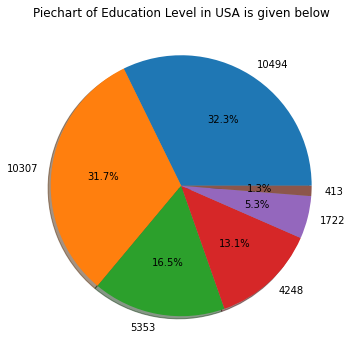

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Piechart of Education Level in USA is given below')
plt.pie(df[' education'].value_counts(), labels=Education.values ,  shadow = True, autopct= '%1.1f%%')
plt.show()

In [ ]:
df[" education"].unique()

array([' Bachelors', ' HS-grad', ' school', ' Masters', ' higher',
       ' Doctorate'], dtype=object)

## Find Correlations

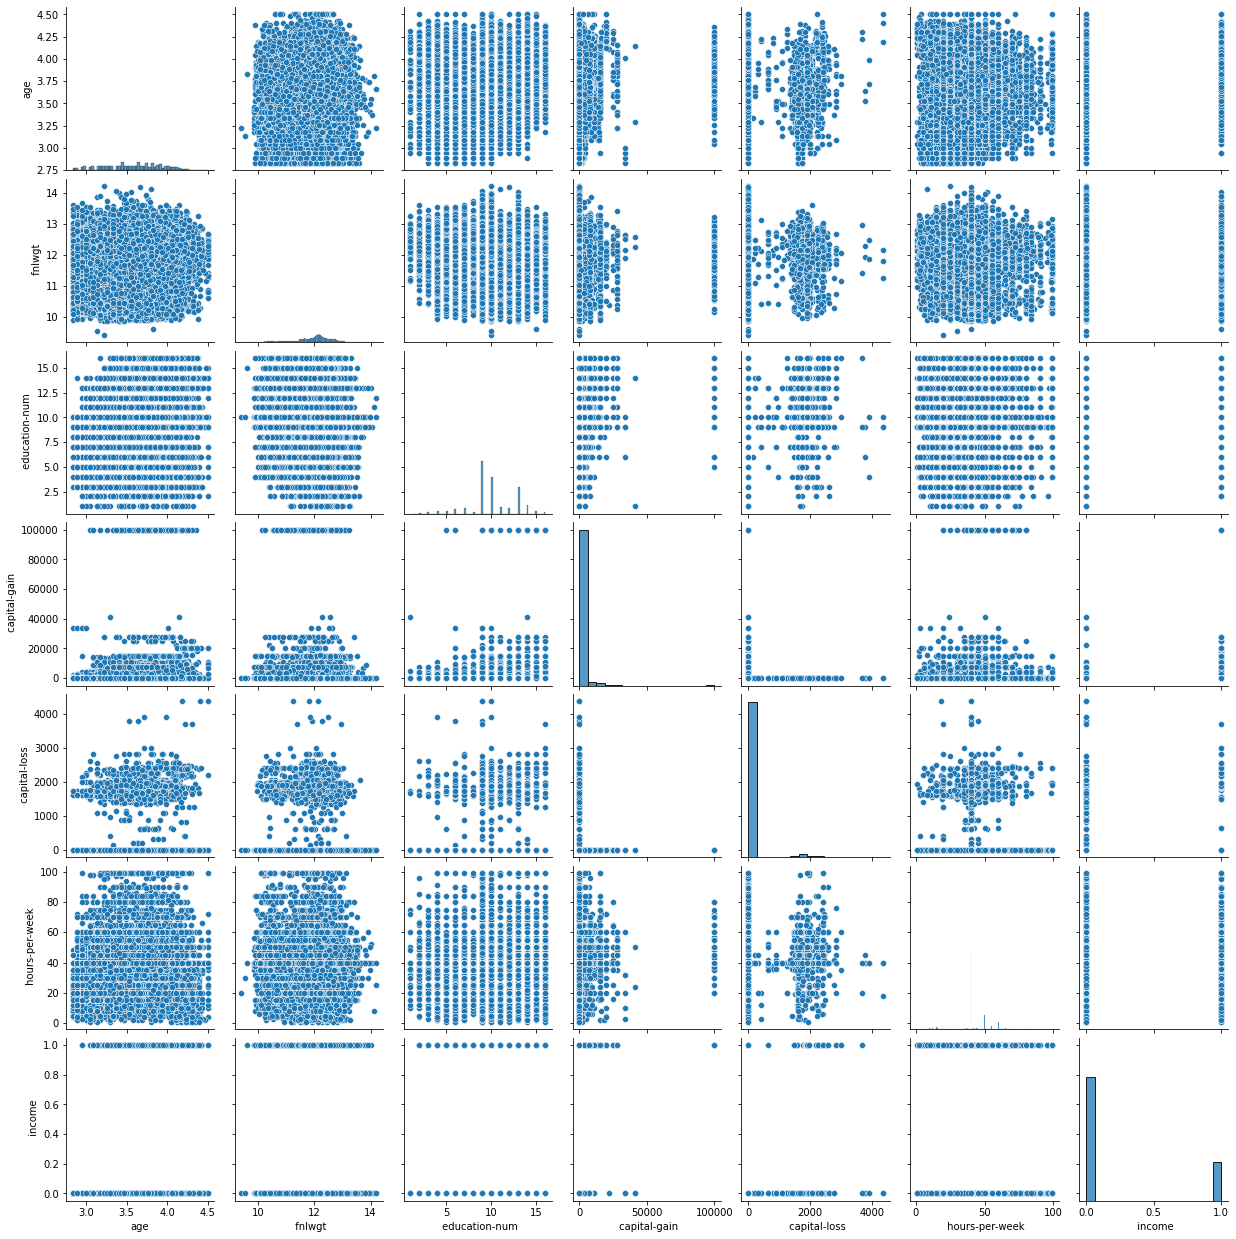

In [ ]:
sns.pairplot(df)

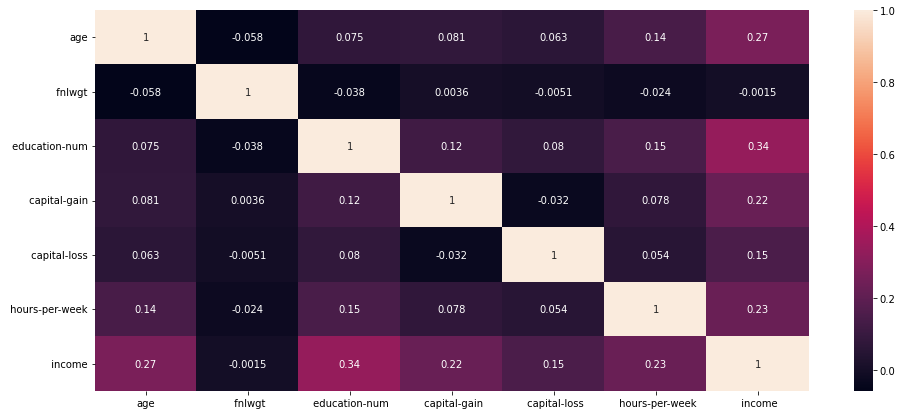

In [ ]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True);

### Label Encoded Data

In [ ]:
from sklearn.preprocessing import  LabelEncoder

In [ ]:
df = df.apply(LabelEncoder().fit_transform)
df 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,2671,0,12,0,0,1,4,1,25,0,39,38,0
1,33,5,2926,0,12,1,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,5,6,1,5,0,2,1,0,0,39,38,0
4,11,3,19355,0,12,1,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,16528,4,11,1,12,5,4,0,0,0,37,38,0
32557,23,3,8080,2,8,1,6,0,4,1,0,0,39,38,1
32558,41,3,7883,2,8,2,0,4,4,0,0,0,39,38,0
32559,5,3,12881,2,8,0,0,3,4,1,0,0,19,38,0


### Outlier Detection for Income and Age

#### Here we can see that there are some outliers so we need to remove them we can do that by Using Inter Quartile Range

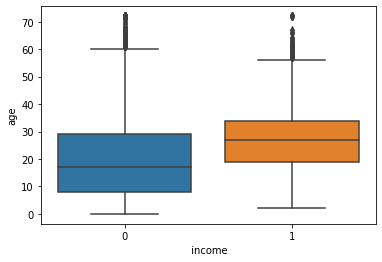

In [ ]:
sns.boxplot(x = ' income', y = 'age', data = df)

In [ ]:
def outlierdetection(df):
    sorted(df)
    
    Q1,Q3=np.percentile(df,[25,75])
    
    IQR=Q3-Q1
    
    lower_range=Q1-(1.5*IQR)
    
    Upper_range=Q3+(1.5*IQR)
    
    return lower_range,Upper_range

In [ ]:
a1 = df[(df[' income'] == 0 )].age
Lr,Ur=outlierdetection(a1)
print("Lower Range : ",Lr)
print("Upper Range : ",Ur)

Lower Range :  -23.5
Upper Range :  60.5


In [ ]:
a2 = df[(df[' income'] == 1 )].age
Lr,Ur=outlierdetection(a2)
print("Lower Range : ",Lr)
print("Upper Range : ",Ur)


Lower Range :  -3.5
Upper Range :  56.5


In [ ]:
df.drop(df.index[(df[' income'] == 0) & (df['age'] < Lr)],inplace=True)
df.drop(df.index[(df[' income'] == 0) & (df['age'] > Ur)],inplace=True)

In [ ]:
df.drop(df.index[(df[' income'] == 1) & (df['age'] < Lr)],inplace=True)
df.drop(df.index[(df[' income'] == 1) & (df['age'] > Ur)],inplace=True)

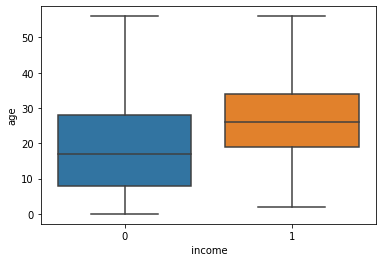

In [ ]:
sns.boxplot(x = ' income', y = 'age', data = df)

Outlier removed of Income and Age

Later we also have good Co-relation for Income and education-num so lets find Outlier for it

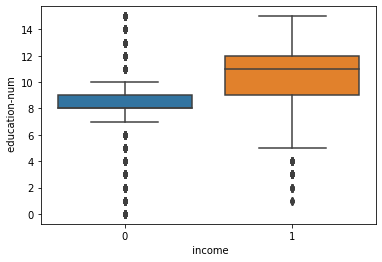

In [ ]:
sns.boxplot(x = ' income', y = ' education-num', data = df)

In [ ]:
b1 = df[(df[' income'] == 0 )][" education-num"]
Lr,Ur=outlierdetection(b1)
print("Lower Range : ",Lr)
print("Upper Range : ",Ur)

Lower Range :  6.5
Upper Range :  10.5


In [ ]:
b2 = df[(df[' income'] == 1 )][" education-num"]
Lr,Ur=outlierdetection(b2)
print("Lower Range : ",Lr)
print("Upper Range : ",Ur)

Lower Range :  4.5
Upper Range :  16.5


In [ ]:
df.drop(df.index[(df[' income'] == 0) & (df[' education-num'] < Lr)],inplace=True)
df.drop(df.index[(df[' income'] == 0) & (df[' education-num'] > Ur)],inplace=True)

In [ ]:
df.drop(df.index[(df[' income'] == 1) & (df[' education-num'] < Lr)],inplace=True)
df.drop(df.index[(df[' income'] == 1) & (df[' education-num'] > Ur)],inplace=True)

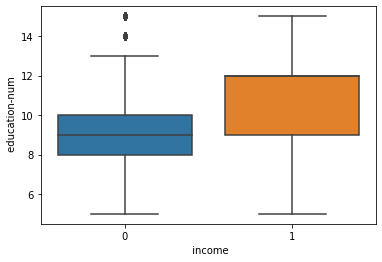

In [ ]:
sns.boxplot(x = ' income', y = ' education-num', data = df)

Here we can see I have succesfully removed Outlier for Income and education-num

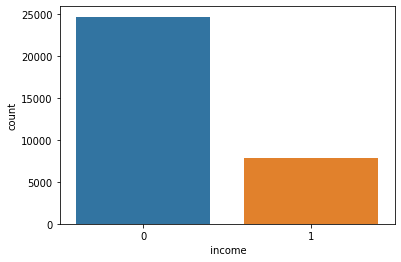

In [ ]:
sns.countplot(x=' income',data=df )

Value Counts of Class 0 and Class 1

In [ ]:
count_class_0,count_class_1 = df[' income'].value_counts()
df_class_0 = df[df[' income']==0]
df_class_1 = df[df[' income']==1]

In [ ]:
df_class_0.shape

(22865, 15)

In [ ]:
df_class_1.shape

(7692, 15)


## Oversampling

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis = 0)
print("Random Over-Sampling")
print(df_test_over[' income'].value_counts())

Random Over-Sampling
1    22865
0    22865
Name:  income, dtype: int64


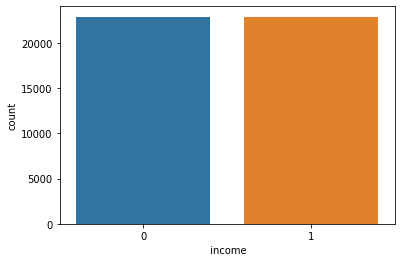

In [ ]:
sns.countplot(x=' income',data=df_test_over )

In [ ]:
X = df_test_over.drop(columns=[' income'])
y = df_test_over[' income']

In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,6,2671,0,12,0,0,1,4,1,25,0,39,38
1,33,5,2926,0,12,1,3,0,4,1,0,0,12,38
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38
3,36,3,15336,5,6,1,5,0,2,1,0,0,39,38
4,11,3,19355,0,12,1,9,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22506,20,3,6790,4,10,2,11,1,4,1,0,0,44,38
19950,24,0,19868,4,9,1,9,0,4,1,0,0,43,38
17136,33,3,14833,4,9,1,10,0,2,1,0,0,68,38
18923,31,3,7862,4,9,0,9,1,4,1,97,0,59,38


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=123,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Check which Algorithms Fits Best Among all the Algorithms based on Accuracy for Oversampled Data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
names = [ "K-Nearest Neighbors", "Linear SVM", "Gradient_Boosting", "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes", "Logistic_Regression" ]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [ ]:
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(X_train,y_train)
  score = clf.score(X_test,y_test)
  scores.append(score)

In [ ]:
scores

[0.8572053356658649,
 0.7650338945987317,
 0.8357752022742182,
 0.812923682484146,
 0.7968510824404111,
 0.8199212770610103,
 0.741198338071288,
 0.7613164224797726]

In [ ]:
df2 = pd.DataFrame()
df2['Names'] = names
df2['Score'] = scores
df2

,Names,Score
0,K-Nearest Neighbors,0.857205
1,Linear SVM,0.765034
2,Gradient_Boosting,0.835775
3,Decision Tree,0.812924
4,Random Forest,0.796851
5,AdaBoost,0.819921
6,Naive Bayes,0.741198
7,Logistic_Regression,0.761316


In [ ]:
cm = sns.light_palette('blue',as_cmap=True)
s = df2.style.background_gradient(cmap=cm)
s

,Names,Score
0,K-Nearest Neighbors,0.857205
1,Linear SVM,0.765034
2,Gradient_Boosting,0.835775
3,Decision Tree,0.812924
4,Random Forest,0.796851
5,AdaBoost,0.819921
6,Naive Bayes,0.741198
7,Logistic_Regression,0.761316


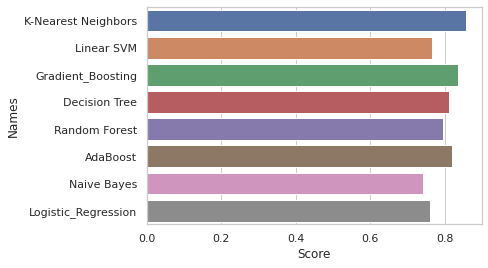

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y ='Names',x = 'Score',data = df2)

### We can see that for Oversampled Data K Nearest Neaghbour Performs Best among all Algorithm so lets Implement it

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',metric = 'minkowski')

In [ ]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,auc

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      4573
           1       0.80      0.90      0.85      4573

    accuracy                           0.84      9146
   macro avg       0.84      0.84      0.83      9146
weighted avg       0.84      0.84      0.83      9146



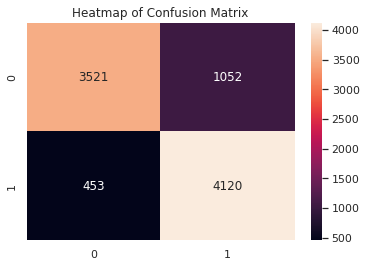

In [ ]:
c_m = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(c_m, annot = True ,  fmt =   "d")
plt.show()  

In [ ]:
roc_auc_score(y_test,y_pred)

0.8354471900284277

In [ ]:
fpr,tpr,threshold =roc_curve(y_test,y_pred)
auc = auc(fpr,tpr)

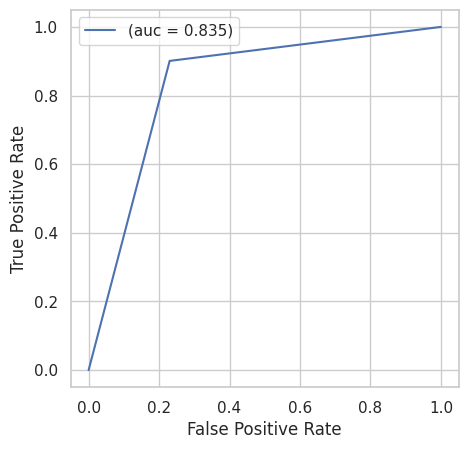

In [ ]:
# Receiver operator Characteristics(ROC)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Undersampling

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(15384, 15)

In [ ]:
print('Random under-sampling')
print(df_test_under[' income'].value_counts())

Random under-sampling
1    7692
0    7692
Name:  income, dtype: int64


In [ ]:
X1 = df_test_under.drop(columns=[' income'])
y1 = df_test_under[' income']

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2,random_state=123,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.fit_transform(X1_test)

In [ ]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gradient_Boosting",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Logistic_Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [ ]:
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(X1_train,y1_train)
  score = clf.score(X1_test,y1_test)
  scores.append(score)

In [ ]:
df2 = pd.DataFrame()
df2['Names'] = names
df2['Score'] = scores
df2

,Names,Score
0,Nearest Neighbors,0.790179
1,Linear SVM,0.768176
2,Gradient_Boosting,0.786033
3,Decision Tree,0.815051
4,Random Forest,0.800702
5,AdaBoost,0.808992
6,Naive Bayes,0.747449
7,Logistic_Regression,0.767538


In [ ]:
cm = sns.light_palette('green',as_cmap=True)
s = df2.style.background_gradient(cmap=cm)
s

,Names,Score
0,Nearest Neighbors,0.790179
1,Linear SVM,0.768176
2,Gradient_Boosting,0.786033
3,Decision Tree,0.815051
4,Random Forest,0.800702
5,AdaBoost,0.808992
6,Naive Bayes,0.747449
7,Logistic_Regression,0.767538


For Undersampling Data Best Accuracy which we get is in Decision Tree Algorithm so lets Implement it

## Decision Tree

In [ ]:
classifier2 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
classifier2.fit(X1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred1 = classifier2.predict(X1_test)

In [ ]:
print(classification_report(y1_test,y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75      1568
           1       0.73      0.90      0.81      1568

    accuracy                           0.78      3136
   macro avg       0.80      0.78      0.78      3136
weighted avg       0.80      0.78      0.78      3136



In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor as regr

In [ ]:

dot_data = StringIO()

In [ ]:

tree.export_graphviz(classifier, out_file = dot_data, filled = True, feature_names=['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'], rounded = True, special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:

graph.write_png("Income.png")

True

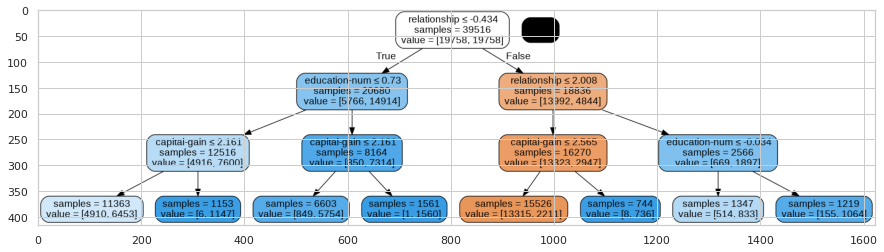

In [ ]:
image = plt.imread('Income.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

Coclusion : 

Here we can rightly classify the income group of American Citizens

This Dataset was Unbanced dataset so I have checked using Oversampling and Undersampling

In Oversampling K-Nearest Neighbour Model works best

In undersampling Decison Tree works Best